#### Load modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data file

In [4]:
all_class_df = pd.read_csv('../data/all_type_class.csv')
beer_class_df = all_class_df[all_class_df['type'] == 'beer']
wine_class_df = all_class_df[all_class_df['type'] == 'wine']
all_class_df.head()

,characteristic,word,type,topic_count,negative,not_negative
0,taste,sweet,beer,34,0.148148,0.851852
1,taste,bitter,beer,26,0.318182,0.681818
2,taste,sour,beer,20,0.142857,0.857143
3,raw material,hop,beer,16,0.076923,0.923077
4,raw material,malt,beer,15,0.000000,1.000000


#### Visualization

##### Plot characteristic graph

In [7]:
def plot_character(df, type, x, xl, colors, yl='Topic Count'):
    data = df[(df['type']==type) & (df['characteristic']==x) & (df['topic_count']>0)][:5]
    ax = sns.barplot(y='topic_count', x='word', data=data, palette=colors[:data['topic_count'].count()], hue='word')
    ax.set_title('Number of topics about '+x, fontsize=15)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.savefig(f'../figures/{type}_topic_count_{x}.png');
    plt.show();

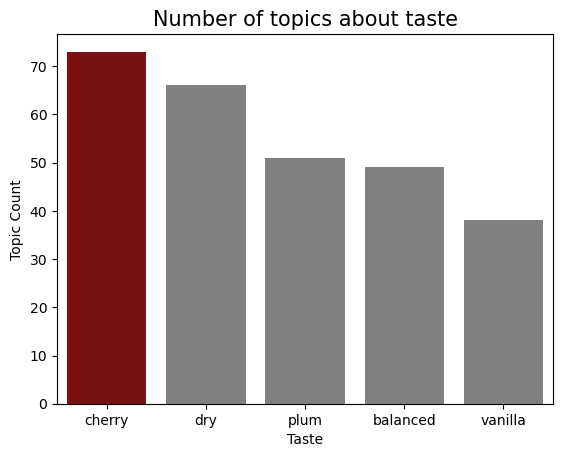

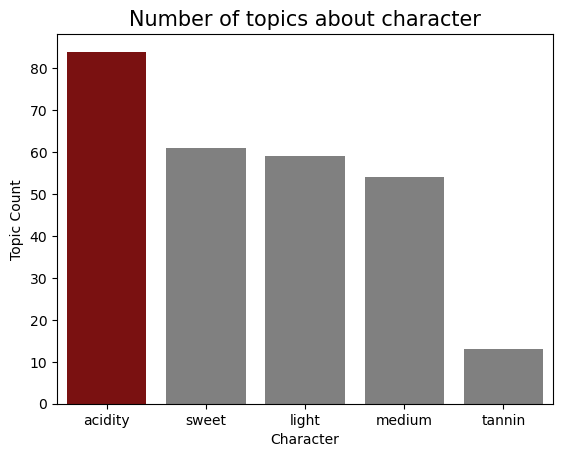

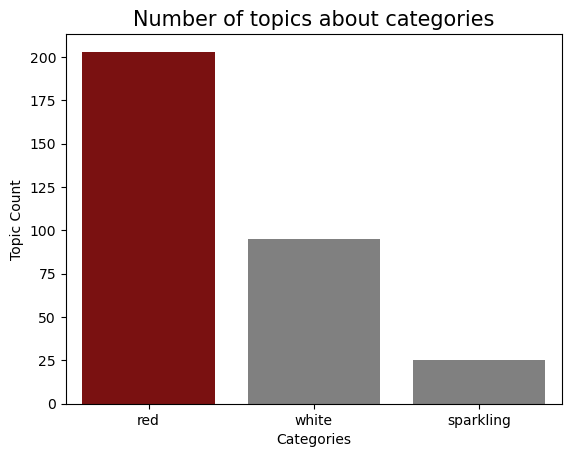

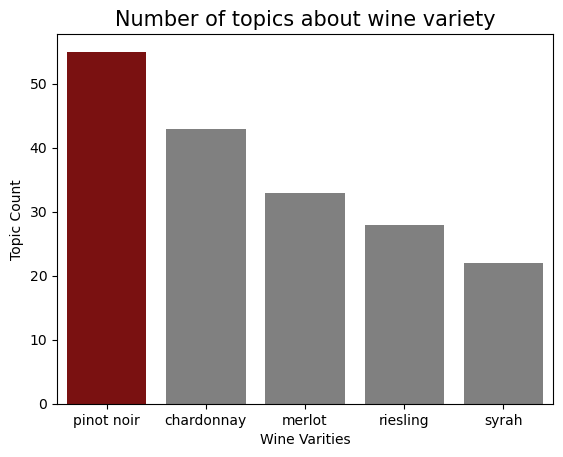

In [8]:
# wine
colors = ['#8B0000', 'gray', 'gray', 'gray', 'gray','grey']
plot_character(all_class_df, 'wine', 'taste', 'Taste', colors=colors)
plot_character(all_class_df, 'wine', 'character', 'Character', colors=colors)
plot_character(all_class_df, 'wine', 'categories', 'Categories', colors=colors)
plot_character(all_class_df, 'wine', 'wine variety', 'Wine Varities', colors=colors)

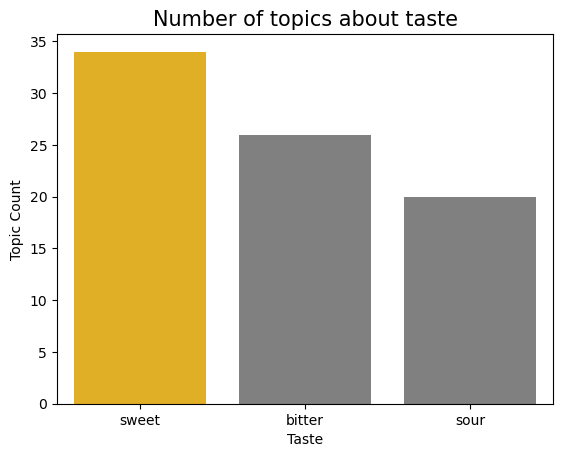

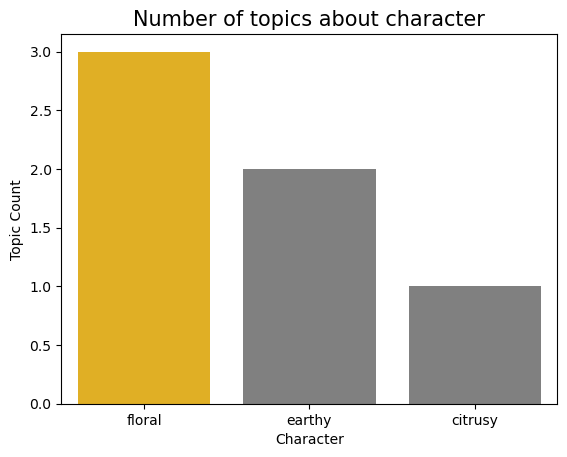

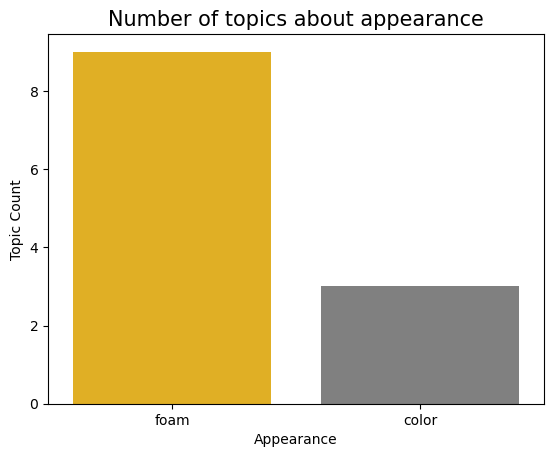

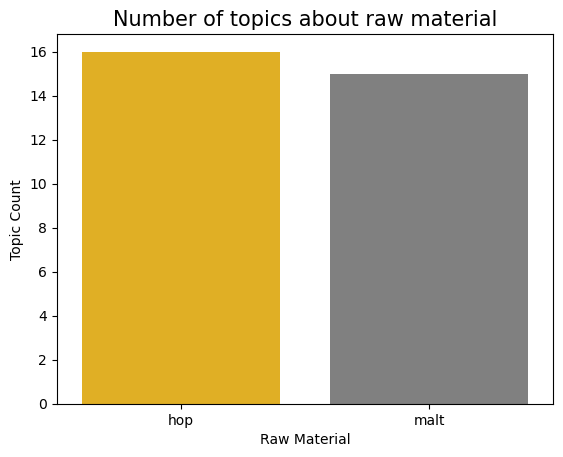

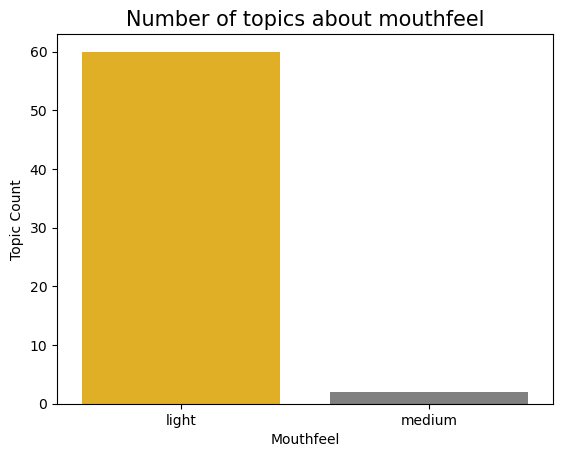

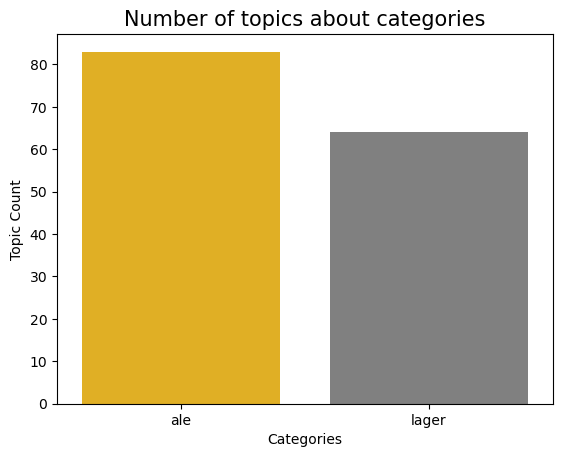

In [9]:
# bear
colors = ['#FFBE06', 'gray', 'gray', 'gray', 'gray']
plot_character(all_class_df, 'beer', 'taste', 'Taste', colors=colors)
plot_character(all_class_df, 'beer', 'character', 'Character', colors=colors)
plot_character(all_class_df, 'beer', 'appearance', 'Appearance', colors=colors)
plot_character(all_class_df, 'beer', 'raw material', 'Raw Material', colors=colors)
plot_character(all_class_df, 'beer', 'mouthfeel', 'Mouthfeel', colors=colors)
plot_character(all_class_df, 'beer', 'categories', 'Categories', colors=colors)

##### Plot Characteristic Sentiment

In [11]:
def plot_stacked(df, type, character, xl, yl='%'):
    plot_df = df[(df['type']==type) & (df['characteristic']==character) & (df['not_negative']>0)][['word','negative','not_negative']][:5]
    plot_df['negative'] *= 100
    plot_df['not_negative'] *= 100
    plot_df.plot(x='word', kind='bar', stacked=True, color=['#AF2B19','#0B804F'])
    plt.xlabel(xl)
    plt.xticks(rotation=0)
    plt.ylabel(yl)
    plt.legend(labels=['Negative', 'Not Negative'])
    plt.title(f'Sentiment of topics for {character}', fontsize=15)
    plt.savefig(f'../figures/sent_stacked_{type}_{character}.png')
    plt.show();

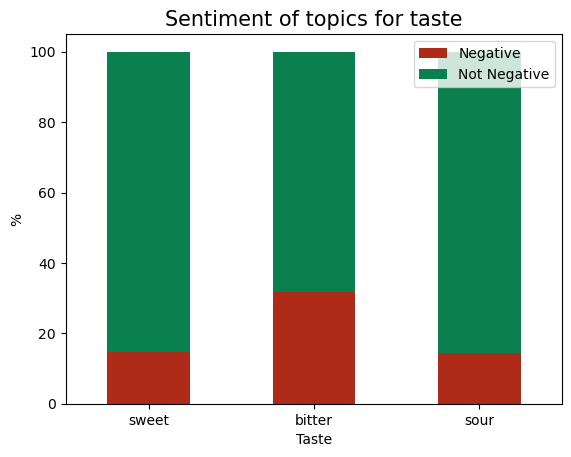

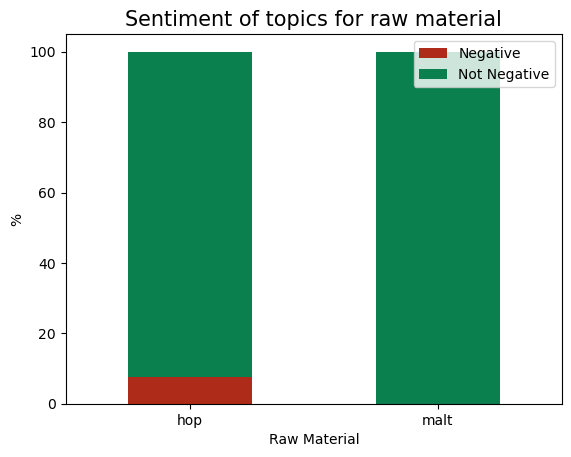

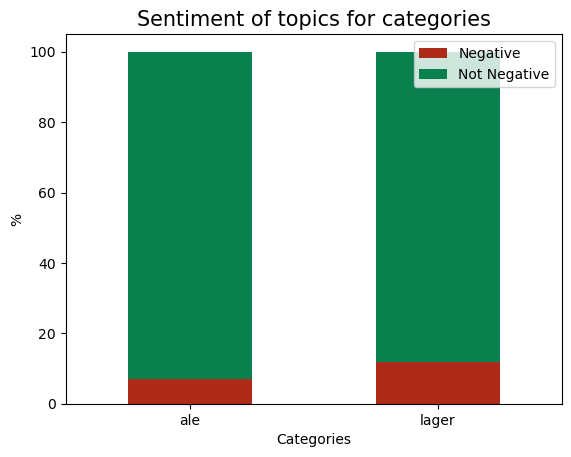

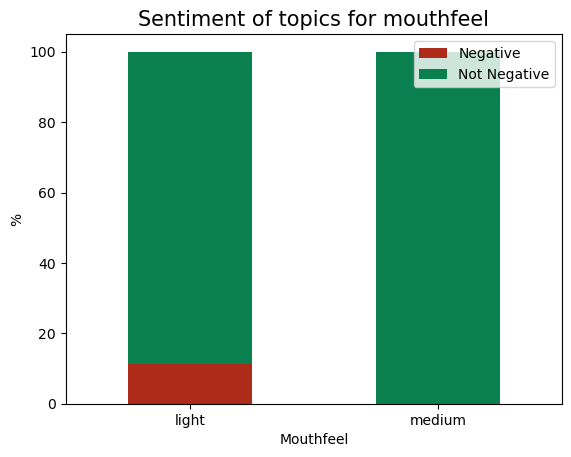

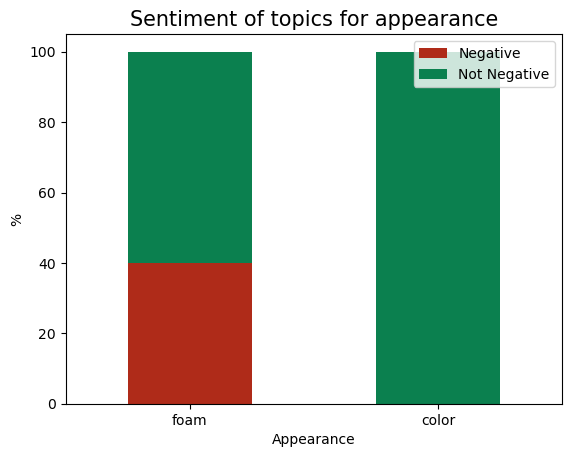

In [12]:
# beer
plot_stacked(all_class_df, 'beer', 'taste', 'Taste')
plot_stacked(all_class_df, 'beer', 'raw material', 'Raw Material')
plot_stacked(all_class_df, 'beer', 'categories', 'Categories')
plot_stacked(all_class_df, 'beer', 'mouthfeel', 'Mouthfeel')
plot_stacked(all_class_df, 'beer', 'appearance', 'Appearance')

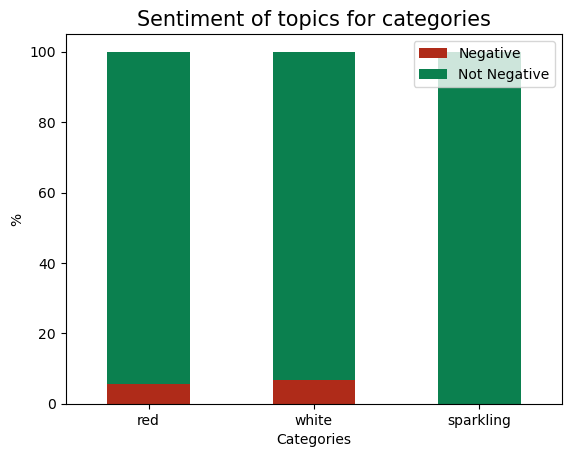

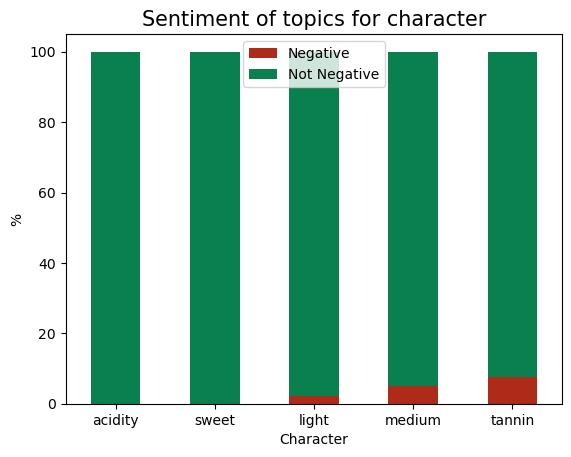

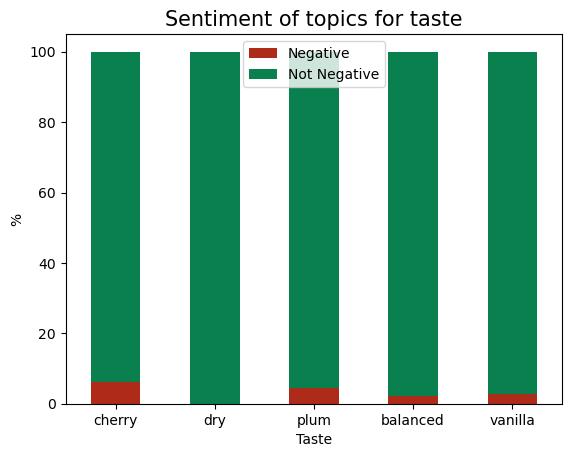

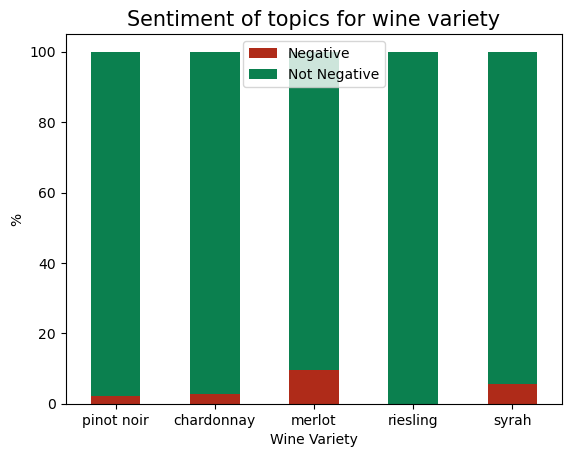

In [13]:
# wine
plot_stacked(all_class_df, 'wine', 'categories', 'Categories')
plot_stacked(all_class_df, 'wine', 'character', 'Character')
plot_stacked(all_class_df, 'wine', 'taste', 'Taste')
plot_stacked(all_class_df, 'wine', 'wine variety', 'Wine Variety')